# <center>CHALLENGE 3<center>

<p>Team Name: Yu-Mex
<p>Student Names: Marco Figueroa, Slavko Slevic, Oluwaseun Doherty
<p>Student W#s: 0730286, 0724929, 0745589

## Instructions
Use generic coding style unless hard-coded values are really necessary.<br>
Your code must be efficient and use self-explanatory naming.<br>
Use appropriate Python library methods for each task instead of using loops.<br>
Run your entire code and save. Then submit this <b>saved</b> copy.

## Imports

In [121]:
import pandas as pd
import numpy as np
import io
import requests
import matplotlib.pyplot as plt

## Loading Data

Load "titanic.csv" into the data frame object "data"</br>
[train.csv](https://github.com/wesm/pydata-book/blob/2nd-edition/datasets/titanic/train.csv)

In [2]:
url = "https://raw.githubusercontent.com/wesm/pydata-book/2nd-edition/datasets/titanic/train.csv"
download = requests.get(url).content

data = pd.read_csv(io.StringIO(download.decode('utf-8')))

In [165]:
data.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data Processing

Create a data frame object "pasUpto19".
> Columns of pasUpto19 = {AGE_12, AGE_TEEN, PCLASS}.<br>
> AGE_12 : Passengers with age in \[1, 12]<br>
> AGE_TEEN : Passengers with age in \[13, 19]<br>

In [44]:
pas1to12 = data[data["Age"].isin(range(1,13))]
pas13to19 = data[data["Age"].isin(range(13,20))]

pasUpto19 = pd.DataFrame(data={"AGE_12": pas1to12["Age"], "AGE_TEEN": pas13to19["Age"], "PCLASS": data["Pclass"]})
pasUpto19 = pasUpto19[(pasUpto19["AGE_12"].isna() == False) | (pasUpto19["AGE_TEEN"].isna() == False)]

pasUpto19.head(10)


,AGE_12,AGE_TEEN,PCLASS
7,2.0,NaN,3
9,NaN,14.0,2
10,4.0,NaN,3
14,NaN,14.0,3
16,2.0,NaN,3
22,NaN,15.0,3
24,8.0,NaN,3
27,NaN,19.0,1
38,NaN,18.0,3
39,NaN,14.0,3


Display 5 rows below and above the middle row of "pasUpto19":

In [45]:
mid = (int)(len(pasUpto19)/2)
pasUpto19.iloc[mid-5:mid+6]

,AGE_12,AGE_TEEN,PCLASS
385,NaN,18.0,2
386,1.0,NaN,3
389,NaN,17.0,2
407,3.0,NaN,2
417,NaN,18.0,2
419,10.0,NaN,3
424,NaN,18.0,3
427,NaN,19.0,2
433,NaN,17.0,3
435,NaN,14.0,1


Group pasUpto19 by AGE_TEEN:

In [49]:
pasUpto19.groupby(["AGE_TEEN"]).size().reset_index()

,AGE_TEEN,0
0,13.0,2
1,14.0,6
2,15.0,5
3,16.0,17
4,17.0,13
5,18.0,26
6,19.0,25


Get the mean of PCLASS for each group of AGE_TEEN and display the mean by age groups:

In [58]:
groupedByTeen = pasUpto19[["AGE_TEEN", "PCLASS"]].groupby(["AGE_TEEN"]).mean()
print(groupedByTeen)

            PCLASS
AGE_TEEN          
13.0      2.500000
14.0      2.500000
15.0      2.600000
16.0      2.529412
17.0      2.384615
18.0      2.461538
19.0      2.360000


Sort "pasUpto19" by the age of teenages and store into a DF object "pasUpto19_sortTeen":

In [59]:
pasUpto19_sortTeen = groupedByTeen.sort_values(by=['AGE_TEEN'])
print(pasUpto19_sortTeen)

            PCLASS
AGE_TEEN          
13.0      2.500000
14.0      2.500000
15.0      2.600000
16.0      2.529412
17.0      2.384615
18.0      2.461538
19.0      2.360000


## Summarize Data

Create "pasUpto19_stat" an object from the statistics of pasUpto19. Use the method describe(). Print the statistics.

In [60]:
pasUpto19_stat = pasUpto19.describe()
print(pasUpto19_stat)

          AGE_12   AGE_TEEN      PCLASS
count  62.000000  94.000000  156.000000
mean    5.225806  17.244681    2.538462
std     3.276440   1.617686    0.712873
min     1.000000  13.000000    1.000000
25%     2.000000  16.000000    2.000000
50%     4.000000  18.000000    3.000000
75%     8.000000  19.000000    3.000000
max    12.000000  19.000000    3.000000


Store each statistics of pasUpto19_stat into a multi-dimensional list "pasUpto19_stat_lst" individually. Print the list.

In [73]:
pasUpto19_stat_lst = pasUpto19_stat.values.tolist()
pasUpto19_stat_lst

[[62.0, 94.0, 156.0],
 [5.225806451612903, 17.24468085106383, 2.5384615384615383],
 [3.2764402656517215, 1.6176856574427694, 0.7128734709665805],
 [1.0, 13.0, 1.0],
 [2.0, 16.0, 2.0],
 [4.0, 18.0, 3.0],
 [8.0, 19.0, 3.0],
 [12.0, 19.0, 3.0]]

Print rows where AGE_12 >= mean of AGE_12 or AGE_TEEN >= mean AGE_TEEN.

In [93]:
mean12 = pasUpto19['AGE_12'].mean()
meanTeen = pasUpto19['AGE_TEEN'].mean()
print(pasUpto19[(pasUpto19['AGE_12'] >= mean12) | (pasUpto19['AGE_TEEN'] >= meanTeen)])

     AGE_12  AGE_TEEN  PCLASS
24      8.0       NaN       3
27      NaN      19.0       1
38      NaN      18.0       3
44      NaN      19.0       3
49      NaN      18.0       3
..      ...       ...     ...
834     NaN      18.0       3
852     9.0       NaN       3
855     NaN      18.0       3
877     NaN      19.0       3
887     NaN      19.0       1

[76 rows x 3 columns]


## Use of method "eval(Age ...)"

<b>Sample Code Snippet:</b><br>
<p>
dic = {"x": pd.Series([2,-1,3,5], name="x"),
      "y": pd.Series((10,11,12), name="y")
      }<br>
df = pd.DataFrame(dic)<br>
print(df)<br>
df.eval("x == 5")
</p>

Get passengers whose age is in \[3,7) or in \[12, 15] and store into "pas3to6_12to15":

In [141]:
bool_series = data.eval("(Age>=3 & Age<7) | (Age>=12 & Age<=15)")
past3to6_12to15 = data[bool_series]
print(past3to6_12to15)

     PassengerId  Survived  Pclass                                      Name  \
9             10         1       2       Nasser, Mrs. Nicholas (Adele Achem)   
10            11         1       3           Sandstrom, Miss. Marguerite Rut   
14            15         0       3      Vestrom, Miss. Hulda Amanda Adolfina   
22            23         1       3               McGowan, Miss. Anna "Annie"   
39            40         1       3               Nicola-Yarred, Miss. Jamila   
43            44         1       2  Laroche, Miss. Simonne Marie Anne Andree   
58            59         1       2              West, Miss. Constance Mirium   
63            64         0       3                     Skoog, Master. Harald   
111          112         0       3                      Zabour, Miss. Hileni   
125          126         1       3              Nicola-Yarred, Master. Elias   
171          172         0       3                      Rice, Master. Arthur   
184          185         1       3      

## Plots

Create a figure "Plots for Pclass and Age"<br>
Plot histograms for "PCLASS", "AGE_12", and "AGE_TEEN" side by side:

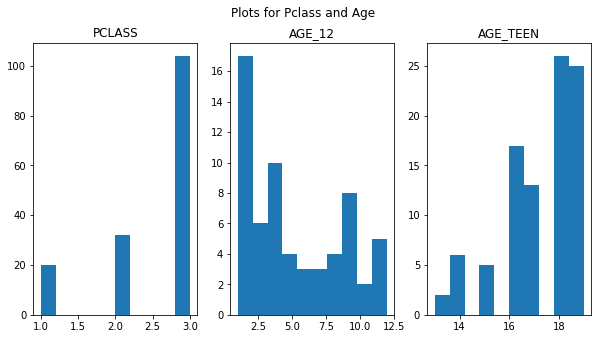

In [140]:
fig, axes = plt.subplots(nrows = 1, ncols=3, figsize=(10, 5))

fig.suptitle('Plots for Pclass and Age')
#first img

axes[0].set_title("PCLASS")
axes[1].set_title("AGE_12")
axes[2].set_title("AGE_TEEN")

axes[0].hist(pasUpto19["PCLASS"])
axes[1].hist(pasUpto19["AGE_12"])
axes[2].hist(pasUpto19["AGE_TEEN"])

plt.show()

Add a scatter plot for "PCLASS" vs. "AGE_12" into the first cell and "PCLASS" vs. "AGE_TEEN" into the last cell on the same figure at the second row:

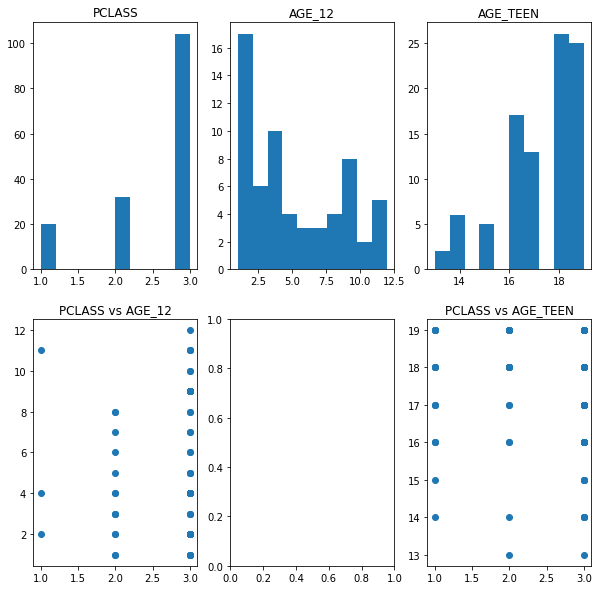

In [164]:
fig, axes = plt.subplots(nrows = 2, ncols=3, figsize=(10, 10))
axes[0,0].set_title("PCLASS")
axes[0,1].set_title("AGE_12")
axes[0,2].set_title("AGE_TEEN")

axes[0,0].hist(pasUpto19["PCLASS"])
axes[0,1].hist(pasUpto19["AGE_12"])
axes[0,2].hist(pasUpto19["AGE_TEEN"])


axes[1,0].set_title("PCLASS vs AGE_12")
axes[1,2].set_title("PCLASS vs AGE_TEEN")

axes[1,0].scatter( pasUpto19['PCLASS'], pasUpto19['AGE_12'])
axes[1,2].scatter( pasUpto19['PCLASS'], pasUpto19['AGE_TEEN'])

plt.show()

## <center> REFERENCES </center>
List resources (book, internet page, etc.) that you used to complete this challenge.

https://www.geeksforgeeks.org
https://www.w3schools.com
https://pandas.pydata.org